# Elaboración de modelo de Regresión Logística para predecir lluvia mayor a 10mm en las próximas 24 horas.

## Dataset obtenido de kaggle.com

- El data set corresponde al historial de datos meteorológicos de Australia comprendido entre 2008-2018
- El data set nos permitiría predecir, en función de una serie de variables, si al día siguiente lloverá
- La variable target a precedir es "RainTomorrow"
- Información y descarga del data set publico en el siguiente link <https://www.kaggle.com/jsphyg/weather-dataset-rattle-package>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weatherAUS.zip')
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
#df.describe()

In [5]:
#df['Location'].value_counts()

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Descripción de las columnas del dataset:

- WindGustDir: La dirección de las ráfagas de viento más fuertes del día.
- WindGustSpeed: La velocidad del viento más fuerte del día.
- MinTemp: La temperatura mínima (°C).
- MaxTemp: La temperatura máxima (°C).
- WinDir3pm: Dirección del viento a las 3pm.
- WindSpeed3pm: Velocidad del viento promedio (km/hr) a las 3pm.
- Humidity3pm: Humedad relativa a las 3pm.
- Pressure3pm: Presión atmosférica (hPa) a las 3pm.
- Rainfall: La cantidad de mm de lluvia caídos en el día.
- Evaporation: Medida en mm de la llamada "Pan Evaporation" de 24hs a 9 am.
- Sunshine: Horas de sol del día.
- WinDir9am: Dirección del viento a las 9am.
- WindSpeed9am: Velocidad del viento promedio (km/hr) a las 9am.
- Humidity9am: Humedad relativa a las 9am.
- Pressure9am: Presión atmosférica (hPa) a las 9am.
- Cloud9am: Fracción del cielo oscurecido por nubes a las 9am. "0" para cielos sin nubes / "8" para cielo completamente cubierto de nubes.
- Cloud3pm: Fracción del cielo oscurecido por nubes a las 3pm. "0" para cielos sin nubes / "8" para cielo completamente cubierto de nubes.
- Temp9am: Temperatura (°C) a las 9am.
- Temp3pm: Temperatura (°C) a las 3pm.
- RainToday: Boolean: "1" si los mm de precipitación de 0 am a 9 am excede el mm.
- RainTomorrow: Boolean: "1" si llovió al día siguiente.
- Location: El nombre de la estación de clima.

In [7]:
porcentajes=(df.isnull().sum()/(df.isnull().sum()+df.notnull().sum())*100).round(2)
porcentajes.sort_values(ascending=False)

Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
RainToday         2.24
Rainfall          2.24
WindSpeed3pm      2.11
Humidity9am       1.82
WindSpeed9am      1.21
Temp9am           1.21
MinTemp           1.02
MaxTemp           0.87
Location          0.00
Date              0.00
dtype: float64


### APUNTES DE LA LIMPIEZA DE DATOS:

#### Quitaremos 'evaporation', 'sunshine', 'Cloud9am', 'Cloud3am' porque tienen muhcos nulos.

#### Luego haremos dropna general.

#### Luego prestaremos atención a la correlación entre features, que podría traer problemas de colinealidad.

In [8]:
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

In [9]:
df = df.dropna()

In [10]:
df.shape

(112925, 19)

In [11]:
# Balance de la variable objetivo del dataset

df['RainTomorrow'].value_counts(normalize=True)

No     0.778446
Yes    0.221554
Name: RainTomorrow, dtype: float64

In [12]:
df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0


In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes',
       'RainTomorrow_Yes'],
      dtype='object')

In [14]:
df.shape


(112925, 19)

In [15]:
df['RainToday_Yes'].value_counts()

0    87556
1    25369
Name: RainToday_Yes, dtype: int64

In [16]:
df['RainTomorrow_Yes'].value_counts()

0    87906
1    25019
Name: RainTomorrow_Yes, dtype: int64

# REGRESIÓN LOGÍSTICA

In [17]:
# Defino la matriz de features y variable objetivo


X = df[['MinTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday_Yes']]
y = df["RainTomorrow_Yes"]

In [18]:
X.shape

(112925, 8)

In [19]:
y.shape

(112925,)

<AxesSubplot:>

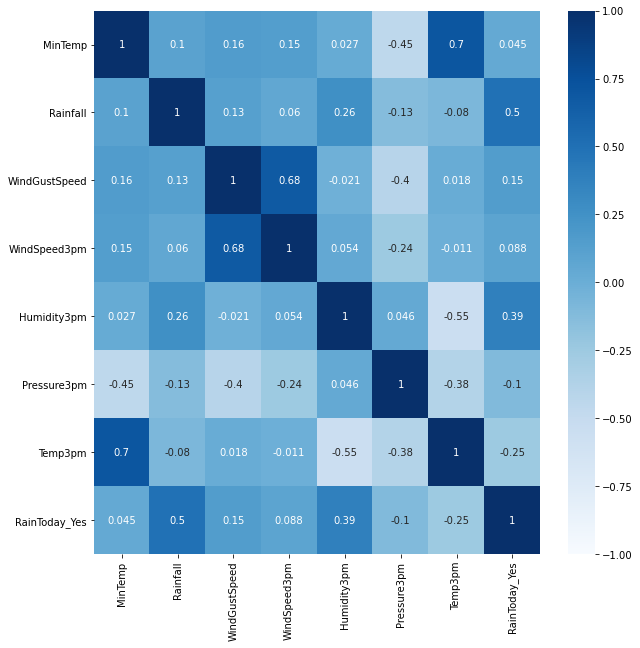

In [20]:
#Chequeo colinearidad
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, vmin=-1, cmap='Blues')

In [21]:
#Divido los datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

In [22]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
#Importamos e instanciamos el modelo de regresión logística con regularización de tipo Elastic Net

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver = "saga", penalty="elasticnet", l1_ratio = 0.5, C = 0.5)

# Ajustamos el modelo
logistic_regression.fit(X_train_scaled, y_train)
# Y visualizamos los coeficientes
print(logistic_regression.coef_)
print(logistic_regression.intercept_)

[[-0.11977485  0.05999572  0.760448   -0.3813887   1.47112339 -0.51097049
   0.06284357  0.1976442 ]]
[-1.83042666]


In [24]:
# Hacemos predicciones con el modelo entrenado
# Notar que debemos escalar los datos de testeo antes de realizar predicciones

y_train_pred = logistic_regression.predict(X_train_scaled)
y_test_pred = logistic_regression.predict(scaler.transform(X_test))

In [25]:
# Elaboramos la matriz de confusión

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[20834,  1143],
       [ 3207,  3048]])

Text(0.5, 15.0, 'Etiquetas predichas')

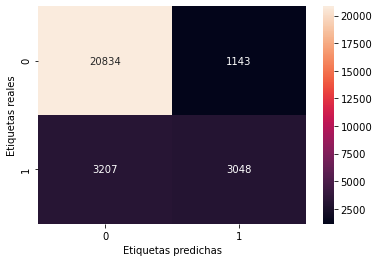

In [26]:
# Graficamos la matriz de confusión

from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [27]:
TP = cm[1, 1]; TN = cm[0, 0] ; FP = cm[0, 1] ; FN = cm[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  3048  TN:  20834  FP:  1143  FN:  3207


In [28]:
# Calculemos el accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8459195239444602

In [29]:
print('Accuracy=', (TP+TN)/ (TP+TN+FP+FN))
print('Total de casos correctamente predichos (TP+TN) =',(TP+TN))
print('Total de casos (TP+TN+FP+FN) =',(TP+TN+FP+FN))

Accuracy= 0.8459195239444602
Total de casos correctamente predichos (TP+TN) = 23882
Total de casos (TP+TN+FP+FN) = 28232


In [30]:
# Calculemos el recall

from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred)

0.48729016786570745

In [31]:
print('Recall=', (TP)/ (TP+FN))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos reales (TP+FN) =',(TP+FN))

Recall= 0.48729016786570745
Total de casos positivos predichos correctamente (TP) = 3048
Total de casos positivos reales (TP+FN) = 6255


In [32]:
# Calculemos la precision

from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

0.7272727272727273


In [33]:
# Calculemos la specificity

print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.9479910815852938
Total de casos negativos predichos correctamente (TN) = 20834
Total de casos negativos (TN+FP) = 21977


In [34]:
# Calculemos la metrica F1

from sklearn.metrics import f1_score

print(f1_score(y_test, y_test_pred))

0.5835726593911544


# Primeras conclusiones

### Estamos teniendo un porcentaje muy alto de Falsos Negativos, es decir, días que se predijo que no llovía y llovió.
### Esto se refleja en un bajo Recall, que ronda el 50%. Sólo logramos "capturar" la mitad de los días que llueve en nuestra predicción.

# Evaluación del umbral del modelo

### No hay que perder de vista que en el modelo de regresión logística estamos obteniendo probabilidades de occurencia que resultan en una clasificación binaria a partir de un umbral de probabilidad determinado, que es 0.5 por defecto.

### En la siguiente sección analizaremos como responde el modelo ante cambios en el umbral usado.

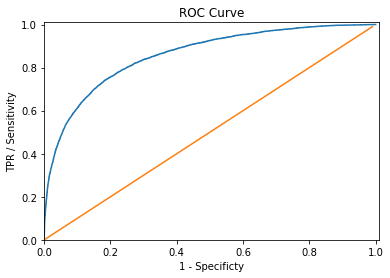

In [35]:
# Graficamos el ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y_test_pred_proba = logistic_regression.predict_proba(scaler.transform(X_test))

fpr_log,tpr_log,thr_log = roc_curve(y_test, y_test_pred_proba[:,1])

datafr = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(datafr['fpr'],datafr['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()


In [36]:
from sklearn.metrics import accuracy_score

threshold = np.arange(0.05,0.975,0.025)
accuracy = []

for p in threshold:
  y_pred = (logistic_regression.predict_proba(scaler.transform(X_test))[:,1] >= p).astype(int)
  accuracy.append(accuracy_score(y_test,y_pred))



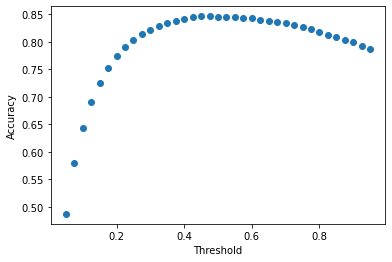

In [37]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

In [39]:
threshold[np.argmax(accuracy)]

0.47500000000000014

# Análisis del umbral

### Vemos que modificar el umbral no brindará mejores resultados respecto al rendimiento global del modelo.
### Los cambios en el umbral dependerán de qué error de falsa predicción querramos evitar.

(0.0, 1.0)

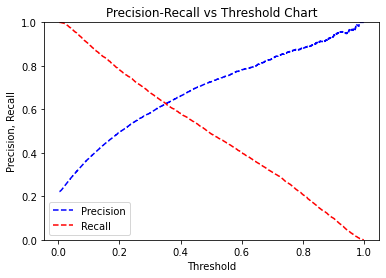

In [40]:
#Vamos a graficar el efecto del threshold en Precision y Recall

pred_y=logistic_regression.predict(scaler.transform(X_test)) 

probs_y=logistic_regression.predict_proba(scaler.transform(X_test)) 

from sklearn import metrics

precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs_y[:, 1]) 
   
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

# Solución Propuesta al bajo recall

### Vamos a calibrar el umbral con el cual el modelo predice que lloverá.

In [41]:
#Sobre-escribimos el umbral por defecto de LogisticRegression que es 0.5 con 0.4

from sklearn.preprocessing import binarize

y_pred_04 = binarize(y_test_pred_proba, threshold=0.4)[:,1]
y_pred_04 = (y_test_pred_proba[:,1] > 0.4).astype(int)

In [42]:
print('Recall umbral 0.4=', recall_score(y_test, y_pred_04))

Recall umbral 0.4= 0.581294964028777


In [43]:
print(precision_score(y_test, y_pred_04))

0.6608505997818975


In [44]:
print(accuracy_score(y_test, y_pred_04))

0.8411377160668745


In [45]:
print(f1_score(y_test, y_pred_04))

0.6185251339627457


[[20111  1866]
 [ 2619  3636]]


Text(0.5, 15.0, 'Etiquetas predichas')

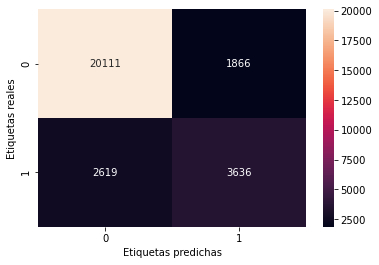

In [46]:
print(confusion_matrix(y_test, y_pred_04))
sns.heatmap(confusion_matrix(y_test, y_pred_04), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

# Conclusiones

### Disminuir el umbral de predicción de 0.5 a 0.4 mejoró el recall pero bajó la precisión.
### Respecto al accuracy total del modelo hubo una baja marginal mientras se mejoró el recall en 10 puntos porcentuales.
### En definitiva, dependerá de qué tipo de error sea más conveniente evitar, un Falso Positivo o un Falso Negativo.  

# CROSS VALIDATION

In [47]:
#Cross Validation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

X = df[['Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm','RainToday_Yes']]
y = df["RainTomorrow_Yes"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = LogisticRegressionCV(cv=5, random_state=0, solver='liblinear', max_iter=100).fit(X, y)

clf.predict(X)

print(clf.predict_proba(X))
print("\n")
print("El score utilizando cross validation es: " + str(clf.score(X, y)))

[[0.96600612 0.03399388]
 [0.95787241 0.04212759]
 [0.94825617 0.05174383]
 ...
 [0.99228899 0.00771101]
 [0.97476288 0.02523712]
 [0.98286718 0.01713282]]


El score utilizando cross validation es: 0.8472348904139916


# GRID SEARCH

In [48]:
#Intentaremos encontrar los mejores hyperparametros de la regresión a través de una búsqueda en grilla

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

X = df[['MinTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday_Yes']]
y = df["RainTomorrow_Yes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y)

folds=StratifiedKFold(n_splits=10, shuffle=False)

logistic_regression = LogisticRegression(max_iter=100)

penalty = ['l2', 'none']

solvers = ['lbfgs', 'newton-cg', 'sag']

grid = dict(solver=solvers,penalty=penalty)

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, cv=folds, scoring='accuracy',error_score=0, verbose=0)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             scoring='accuracy')

In [49]:
print("Mejor score: %f usando %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor score: 0.847543 usando {'penalty': 'none', 'solver': 'lbfgs'}
0.847520 (0.002436) with: {'penalty': 'l2', 'solver': 'lbfgs'}
0.847532 (0.002421) with: {'penalty': 'l2', 'solver': 'newton-cg'}
0.847520 (0.002436) with: {'penalty': 'l2', 'solver': 'sag'}
0.847543 (0.002407) with: {'penalty': 'none', 'solver': 'lbfgs'}
0.847543 (0.002407) with: {'penalty': 'none', 'solver': 'newton-cg'}
0.847543 (0.002407) with: {'penalty': 'none', 'solver': 'sag'}


In [50]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'],ascending=True).iloc[:3,:]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.081452,0.006004,0.000880,0.000111,none,lbfgs,"{'penalty': 'none', 'solver': 'lbfgs'}",0.846399,0.845927,0.850767,0.844492,0.843311,0.847798,0.848979,0.847916,0.851104,0.848742,0.847543,0.002407,1
4,0.402450,0.030195,0.001230,0.000254,none,newton-cg,"{'penalty': 'none', 'solver': 'newton-cg'}",0.846399,0.845927,0.850767,0.844492,0.843311,0.847798,0.848979,0.847916,0.851104,0.848742,0.847543,0.002407,1
5,0.491260,0.064281,0.000805,0.000039,none,sag,"{'penalty': 'none', 'solver': 'sag'}",0.846399,0.845927,0.850767,0.844492,0.843311,0.847798,0.848979,0.847916,0.851104,0.848742,0.847543,0.002407,1


In [51]:
print (grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

LogisticRegression(penalty='none')
0.8475434751060295
{'penalty': 'none', 'solver': 'lbfgs'}


In [52]:
y_pred_grid = grid_search.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21977
           1       0.73      0.49      0.59      6255

    accuracy                           0.85     28232
   macro avg       0.80      0.72      0.75     28232
weighted avg       0.84      0.85      0.84     28232



In [54]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[20804  1173]
 [ 3159  3096]]


### Conclusión: El túneo de hiperparámetros no generó ganancias significativas en Accuracy ni en Recall, los mejores resultados en términos de Recall se obtuvieron mediante el cambio del umbral de clasificación con una penalidad mínima en el Accuracy total.

# Boosting

- Técnica de ensamble en la que el entrenamiento es secuencial

In [55]:
#Modelo de boosting AdaBoost

############################

from sklearn.ensemble import AdaBoostClassifier

#Defino el modelo nuevamente

X = df[['MinTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Temp3pm', 'RainToday_Yes']]
y = df["RainTomorrow_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_regressor = LogisticRegression(solver = "lbfgs", penalty="l2", C = 0.5)

#Utilizo el modelo de AdaBoost

boost_logreg = AdaBoostClassifier(base_estimator = base_regressor, n_estimators = 200, learning_rate = 1)

boost_logreg.fit(X_train_scaled, y_train)

y_pred = boost_logreg.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.8457778407480873


In [56]:
boost_logreg.score(X_test_scaled, y_test)

0.8457778407480873

[[20821  1156]
 [ 3198  3057]]


Text(0.5, 15.0, 'Etiquetas predichas')

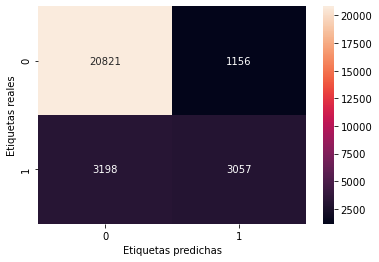

In [57]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [58]:
#Probamos AdaBoost sin definir un modelo base, por lo que tomará un modelo DecissionTreeClassifier con max_depth = 1

boost_logreg = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.75)

boost_logreg.fit(X_train_scaled, y_train)

y_pred = boost_logreg.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8470529895154435


[[20843  1134]
 [ 3184  3071]]


Text(0.5, 15.0, 'Etiquetas predichas')

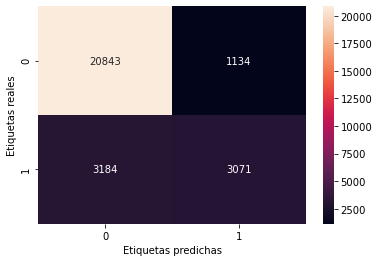

In [59]:
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [60]:
print("Recall ", recall_score(y_test, y_pred))

print("F1 Score ", f1_score(y_test, y_pred))

Recall  0.4909672262190248
F1 Score  0.587189292543021


In [61]:
# Modelo de boosting XGBoost

############################

# Descomentar la siguiente línea y correr en caso de necesitar instalar la librería:

# !conda install --y xgboost

from xgboost import XGBClassifier

In [62]:
# Definimos los parámetros de tuneo del modelo a realizar por GridSearch

params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [64]:
# Instanciamos el modelo de XGBoost

xgboost_model = XGBClassifier(n_jobs=-1, use_label_encoder=False, verbosity=0)

In [65]:
# Definimos la búsqueda en grilla.

xg_grid = GridSearchCV(estimator= xgboost_model, param_grid=params, cv=cv)

In [66]:
# Entrenamos el modelo de grilla

xg_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,

In [67]:
# Mostramos los mejores parámetros encontrados para el modelo

xg_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [68]:
#Configuramos un nuevo modelo con los parámetros óptimos

xg_best = XGBClassifier(n_estimators=500, max_depth=4, learning_rate=0.1, n_jobs=-1, use_label_encoder=False, verbosity=0)

In [69]:
# Entrenamos

xg_best.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [70]:
y_pred = xg_best.predict(X_test_scaled)

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7290038415643241

In [72]:
print("Recall ", recall_score(y_test, y_pred))

print("F1 Score ", f1_score(y_test, y_pred))

Recall  0.5104716227018385
F1 Score  0.6023960003773229


In [73]:
print("Accuracy ", accuracy_score(y_test, y_pred))

Accuracy  0.8507013318220459


In [74]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21977
           1       0.73      0.51      0.60      6255

    accuracy                           0.85     28232
   macro avg       0.80      0.73      0.76     28232
weighted avg       0.84      0.85      0.84     28232



In [75]:
y_pred_xg_04 = xg_best.predict_proba(X_test_scaled)
y_pred_xg_04 = binarize(y_pred_xg_04, threshold=0.4)[:,1]
y_pred_xg_04 = (y_pred_xg_04 > 0.4).astype(int)

In [76]:
print("Recall ", recall_score(y_test, y_pred_xg_04))

print("F1 Score ", f1_score(y_test, y_pred_xg_04))

Recall  0.5950439648281375
F1 Score  0.631704005431093


In [77]:
print("Accuracy ", accuracy_score(y_test, y_pred_xg_04))

Accuracy  0.8462737319353925


[[20170  1807]
 [ 2533  3722]]


Text(0.5, 15.0, 'Etiquetas predichas')

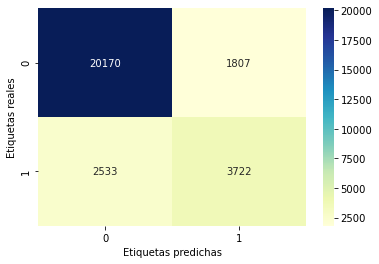

In [78]:
print(confusion_matrix(y_test, y_pred_xg_04))
sns.heatmap(confusion_matrix(y_test, y_pred_xg_04), annot=True, fmt='.0f', cmap="YlGnBu")
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

In [79]:
print (classification_report(y_test, y_pred_xg_04))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     21977
           1       0.67      0.60      0.63      6255

    accuracy                           0.85     28232
   macro avg       0.78      0.76      0.77     28232
weighted avg       0.84      0.85      0.84     28232



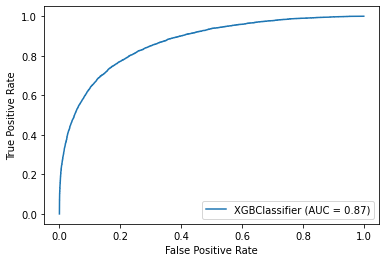

In [80]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(xg_best, X_test_scaled, y_test)
plt.show()

In [83]:
print("Area Under Curve score ", roc_auc_score(y_test, y_pred_xg_04))

Area Under Curve score  0.756410820745051
